<a href="https://colab.research.google.com/github/peterjsadowski/ics235/blob/master/tutorials/01_Jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Jupyter

This is a Jupyter notebook --- a single file that contains code, figures, and text. You can run it using Jupyter on your machine, or in a free cloud container using [Google Colab](https://colab.research.google.com).

Notebooks are organized into cells. Each cell contains either text or code. Code cells can be executed using Ctrl-Enter or clicking the 'run' button.

In [0]:
# This is a code cell. Select me and press Ctrl-Enter.
message = "Success!"
print(message)

Success!


Create new code cells using the '+' menu or via the keyboard shortcut 'Ctrl-m b'. 

In [0]:
# This is a second code cell.
print(message) # Requires message defined in first code cell.
'(Another) ' + message # The return value of the last line of a cell is printed.

Success!


'(Another) Success!'

# Loading Data

As an example, we will load a spreadsheet of data using the pandas library and run some visualizations.

In [0]:
# To load Excel data, we need an additional library. 
# Python libraries can be installed using pip.
# The exclamation point is 'Jupyter Magic' for running this command in the shell.
!pip install xlrd

In [0]:
import pandas
import urllib

url  = 'http://www.saedsayad.com/datasets/Iris.xls'  # Alternatively: "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
filename = './Iris.xls'
response = urllib.request.urlretrieve(url, filename) # Download file. 
data = pandas.read_excel(filename, usecols=range(5)) # Read file into pandas DataFrame object.
data['iris'] = pandas.Categorical(data['iris'])      # Tells pandas that this is a categorical feature.
print('Data matrix shape is:' + str(data.shape))    
print(data.head(n=4))

Data matrix shape is:(150, 5)
   sepal length  sepal width  petal length  petal width         iris
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa


# Manipulating Data

In [0]:
print('Unique species: ' + str(data['iris'].unique()))
print('Mean sepal length: ' + str(data['sepal length'].mean()))
print('')
# Pandas has a nice method called 'corr' that produces a correlation matrix.
print('Correlation matrix: ')
print(str(data.corr()))

Unique species: [Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]
Mean sepal length: 5.843333333333334

Correlation matrix: 
              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


# Plotting Data

In [0]:
# Scatter plot matrix. 
pandas.plotting.scatter_matrix(data, c=data['iris'].cat.codes, figsize=(10,6));

NameError: name 'pandas' is not defined

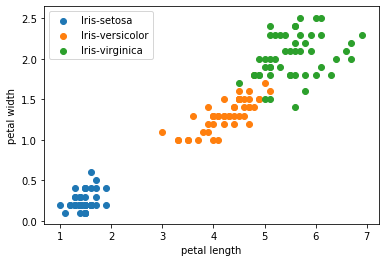

In [0]:
# Plot petal width vs. length.
import matplotlib.pyplot as plt 
for species in data['iris'].cat.categories:
    subset = data.loc[data['iris'] == species]
    plt.scatter(subset['petal length'], subset['petal width'], label=species)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend();

# Visualization with 2D Embeddings

Visualizing high-dimensional data is challenging. Viewing two dimensions at a time, as we did above, is often insufficient for capturing the structure of the data. *Embeddings* map high-dimensional data to 2D in a 'smart' way. They necessarily lose information, so they aren't perfect, but they can be extremely useful for exploratory data analysis. 

Two common embeddings for visualization are Principle Component Analysis (PCA) and UMAP. These methods make very different assumptions about the data, so the visualizations look very different. 

Fraction of variance explained by PC1: 0.92
Additional variance explained by PC2: 0.05


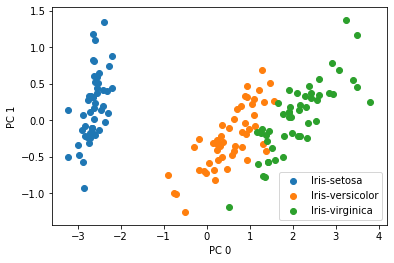

In [0]:
from sklearn.decomposition import PCA

X     = data.iloc[:,:4]
pca   = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('Fraction of variance explained by PC1: %0.2f' % pca.explained_variance_ratio_[0])
print('Additional variance explained by PC2: %0.2f' % pca.explained_variance_ratio_[1])

for species in data['iris'].cat.categories:
    subset = X_pca[data['iris'] == species]
    plt.scatter(subset[:,0], subset[:,1], label=species)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.legend();

In [0]:
#!pip install umap-learn
import umap

X       = data.iloc[:,:4]
reducer = umap.UMAP()
X_umap  = reducer.fit_transform(X)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=data.cat.codes)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

/home/psadow/.conda/envs/env_9_2019/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


AttributeError: 'DataFrame' object has no attribute 'cat'

In [0]:
data.cat

AttributeError: 'DataFrame' object has no attribute 'cat'

# Learning



In [0]:
subset = data.loc[data['iris'].isin(['Iris-versicolor', 'Iris-virginica'])]
X = subset.iloc[:,:4]
y = subset['iris'].cat.codes

In [0]:
from sklearn.linear_model import LogisticRegression

# Use only two classes from the data set.
subset = data.loc[data['iris'].isin(['Iris-versicolor', 'Iris-virginica'])]
X = subset.iloc[:,:4]
y = subset['iris'].cat.codes

# Fit logistic regression model to 100 data points.
reg = LogisticRegression(solver='lbfgs').fit(X, y)
acc_train = reg.score(X, y)
print('Accuracy on training set: %0.1f%%' % (acc_train * 100))


yhat = reg.predict(X)

subset = data.loc[data['iris'] == species]
plt.scatter(subset['petal length'], subset['petal width'], label=species)

for species in data['iris'].cat.categories:
    subset = data.loc[data['iris'] == species]
    plt.scatter(subset['petal length'], subset['petal width'], label=species)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend();

In [0]:
yhat